In [ ]:
import pandas as pd

In [19]:
pd.read_excel("/content/online_retail_II.xlsx")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


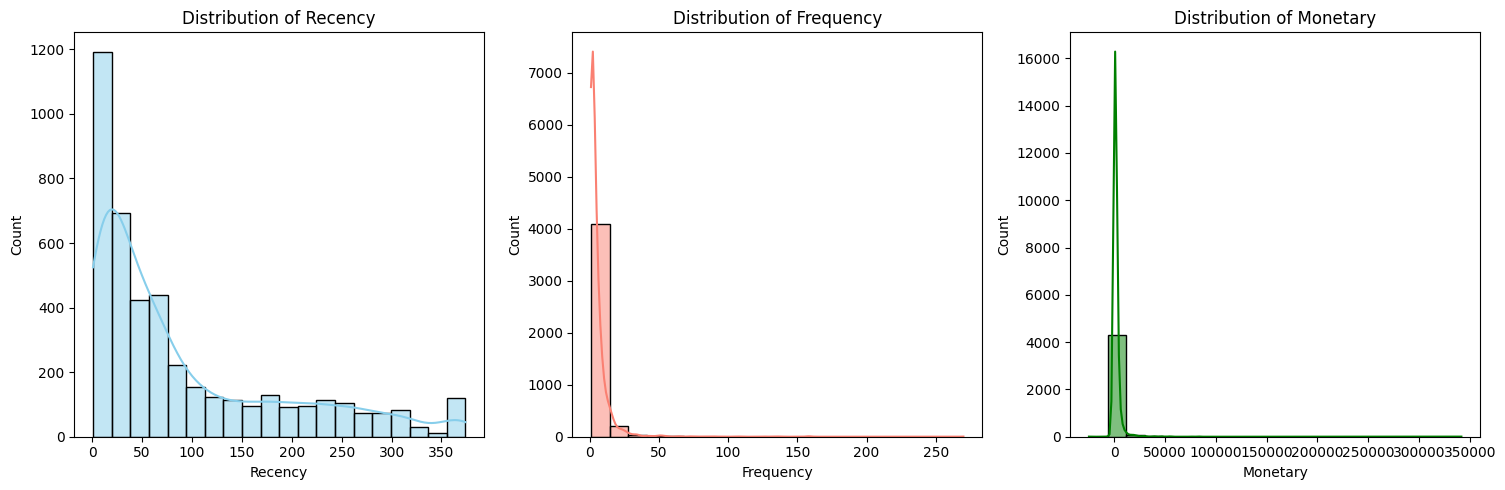

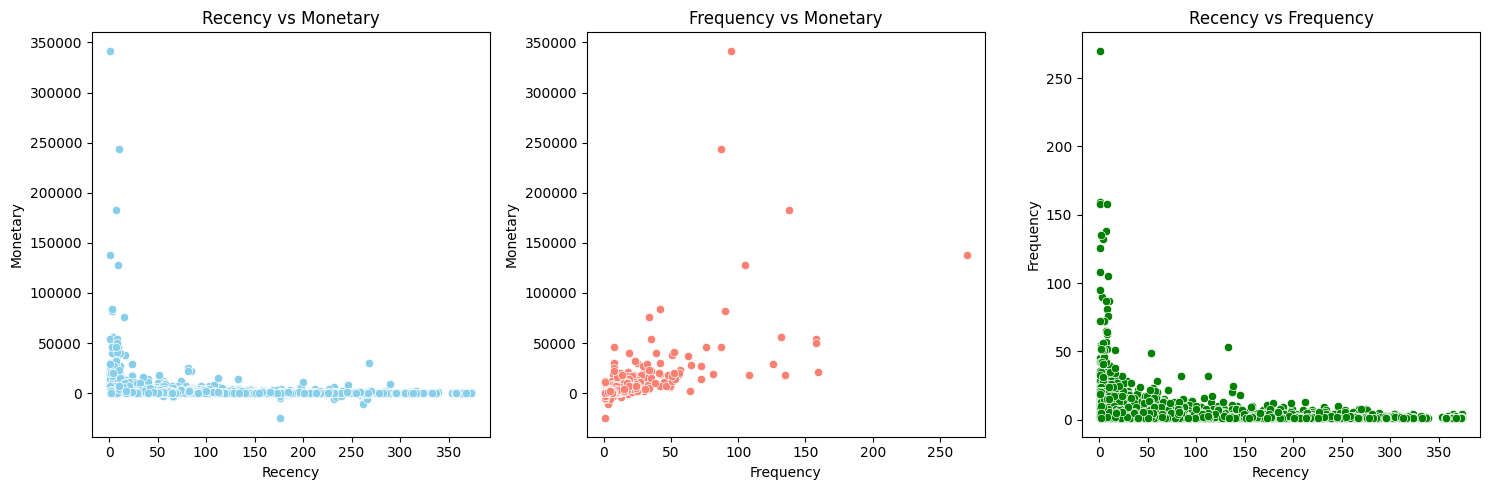

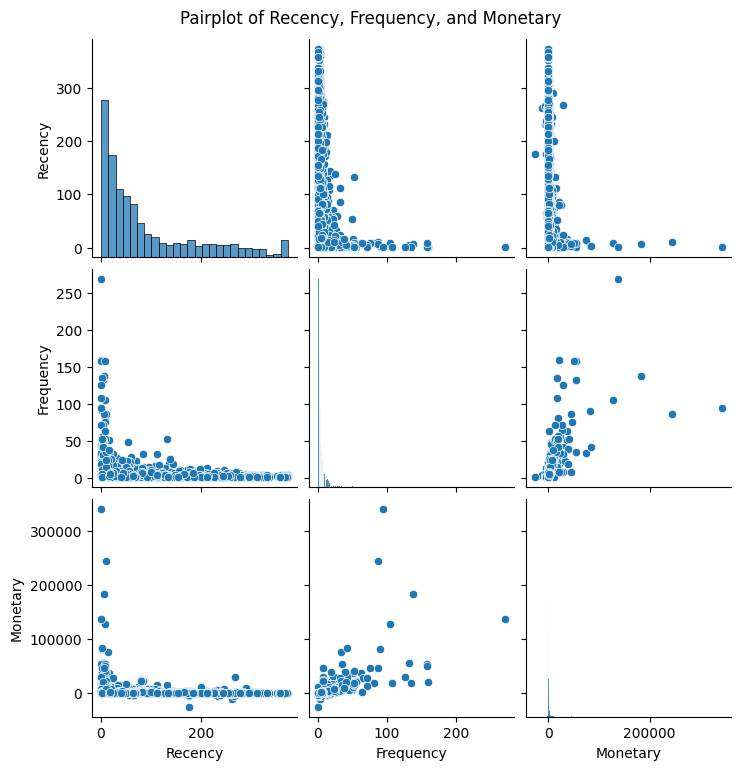

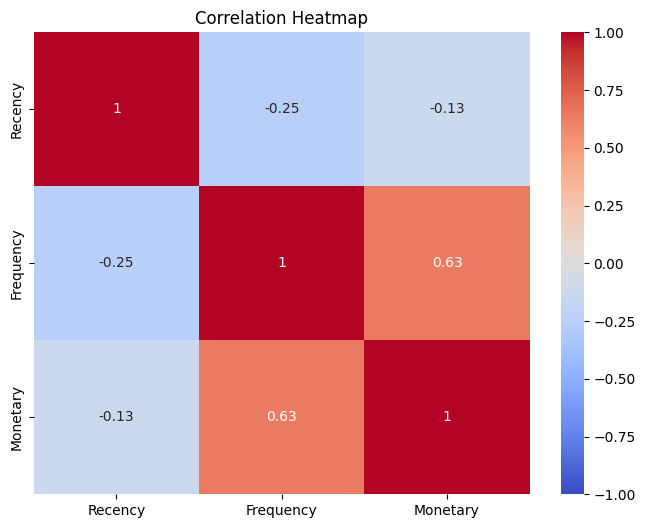

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path
file_path = 'online_retail_II.xlsx'  # Replace with your actual file path

# Attempt to load the dataset with error handling
try:
    # Load the dataset
    df = pd.read_excel("/content/online_retail_II.xlsx")

    # Display the first few rows and inspect column names
    print(df.head())

    # Check column names
    print(df.columns)

    # Data cleaning and preprocessing
    # Drop rows with missing Customer ID
    df.dropna(subset=['Customer ID'], inplace=True)

    # Convert InvoiceDate to datetime
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # Calculate TotalAmount
    df['TotalAmount'] = df['Quantity'] * df['Price']

    # Example: Feature engineering
    snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
    customer_df = df.groupby(['Customer ID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'Invoice': 'nunique',  # Count unique invoices as Frequency
        'TotalAmount': 'sum'
    }).reset_index()

    customer_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

    # Visualizations
    # Distribution plots
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(customer_df['Recency'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Recency')

    plt.subplot(1, 3, 2)
    sns.histplot(customer_df['Frequency'], bins=20, kde=True, color='salmon')
    plt.title('Distribution of Frequency')

    plt.subplot(1, 3, 3)
    sns.histplot(customer_df['Monetary'], bins=20, kde=True, color='green')
    plt.title('Distribution of Monetary')

    plt.tight_layout()
    plt.show()

    # Scatter plots
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x='Recency', y='Monetary', data=customer_df, color='skyblue')
    plt.title('Recency vs Monetary')

    plt.subplot(1, 3, 2)
    sns.scatterplot(x='Frequency', y='Monetary', data=customer_df, color='salmon')
    plt.title('Frequency vs Monetary')

    plt.subplot(1, 3, 3)
    sns.scatterplot(x='Recency', y='Frequency', data=customer_df, color='green')
    plt.title('Recency vs Frequency')

    plt.tight_layout()
    plt.show()

    # Pairplot (for correlation between variables)
    sns.pairplot(customer_df[['Recency', 'Frequency', 'Monetary']])
    plt.suptitle('Pairplot of Recency, Frequency, and Monetary', y=1.02)
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(customer_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

except Exception as e:
    print(f"Error reading or processing the file: {e}")
